In [47]:
# pip install textblob

In [1]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
reviews = pd.read_excel("Restaurant_Reviews.xlsx")
reviews.sample(3)

,Review
604,Couldn't ask for a more satisfying meal.
991,Spend your money and time some place else.
492,"Worse of all, he humiliated his worker right i..."


In [4]:
reviews.shape

(1000, 1)

In [5]:
reviews["Sentiment"] = "Sentiment"
reviews.sample(3)

In [15]:
# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(review):
    blob = TextBlob(review)
    sentiment_score = blob.sentiment.polarity

    # Sentiment polarity ranges from -1 to 1.
    # If the sentiment score is greater than 0, the review is positive.
    # If the sentiment score is less than 0, the review is negative.
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

In [16]:
# Perform sentiment analysis on each review
for i in range(0, reviews.shape[0]):
    review = reviews.iloc[i][0]
    sentiment = analyze_sentiment(review)
    reviews.Sentiment.iloc[i] = reviews.Sentiment.iloc[i].replace("Sentiment", sentiment)

In [18]:
reviews.sample(5)

,Review,Sentiment
995,I think food should have flavor and texture an...,Neutral
996,Appetite instantly gone.,Neutral
997,Overall I was not impressed and would not go b...,Negative
998,"The whole experience was underwhelming, and I ...",Positive
999,"Then, as if I hadn't wasted enough of my life ...",Negative


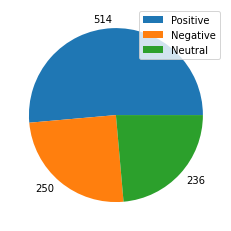

In [46]:
plt.pie(reviews.Sentiment.value_counts(),
       labels = reviews.Sentiment.value_counts().values, fig)
plt.legend(["Positive", "Negative", 'Neutral']);